<h1 align=center><font size = 5>Health Care Analysis</font></h1>

In [390]:
import numpy as np

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import json 

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests # library to handle requests

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

from sklearn.preprocessing import StandardScaler
from pandas.io.json import json_normalize 
from sklearn.cluster import DBSCAN, KMeans


%matplotlib inline

## Project description

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Datasets</a>

2. <a href="#item2">Clean Data</a>

3. <a href="#item3">Explore Countries Selected</a>

4. <a href="#item4">Retrieving Foursquare Data</a> 
    
5. <a href="#item5">DSBC Clustering</a>    

6. <a href="#item6">K-Means Clustering</a>  

7. <a href="#item6">Results Visualization</a>   
</font>
</div>

## 1. Download and Explore Datasets

In [391]:
Data_health=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_total_health_expenditure_per_capita')[5]
Data_health.head(190)

,Countries,2000,2005,2010,2015
0,Afghanistan,:,24,46,60
1,Albania,76,166,204,266
2,Algeria,61,100,228,292
3,Andorra,2051,4037,4596,4316
4,Angola,14,57,97,109
5,Antigua and Barbuda,381,490,673,657
6,Argentina,418,327,699,998
7,Armenia,41,116,169,366
8,Australia,1632,3004,4953,4934
9,Austria,2263,3676,4725,4536


In [392]:
Data_health.shape

(189, 5)

In [393]:

Data_Cost_Life=pd.read_html('https://www.numbeo.com/cost-of-living/rankings_by_country.jsp')[2]
Data_Cost_Life.head(140)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,Cayman Islands,141.64,74.40,109.49,157.93,105.03,137.88
1,NaN,Bermuda,138.22,87.62,114.03,124.87,150.40,79.87
2,NaN,Switzerland,122.67,50.22,88.03,121.29,124.04,127.76
3,NaN,Norway,104.49,37.26,72.34,93.94,115.59,98.00
4,NaN,Us Virgin Islands,97.23,48.24,73.81,87.42,90.74,54.58
5,NaN,Iceland,97.22,45.08,72.29,84.63,111.46,92.03
6,NaN,Bahamas,85.96,35.40,61.79,68.84,87.20,56.21
7,NaN,Japan,85.52,28.08,58.06,84.69,50.05,97.57
8,NaN,Luxembourg,84.68,55.44,70.70,71.60,92.91,107.89
9,NaN,Denmark,83.88,33.73,59.90,64.02,100.63,110.69


In [394]:
Data_Cost_Life.shape

(136, 8)

In [395]:
Data_Life_Expentancy=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy')[1]
Data_Life_Expentancy.head(196)

Rank                     Country/Region  \
    Rank                     Country/Region   
0      1                          Hong Kong   
1      2                              Japan   
2      3                        Switzerland   
3      4                          Singapore   
4      5                              Italy   
5      5                              Spain   
6      7                          Australia   
7      8                            Iceland   
8      9                             Israel   
9      9                        South Korea   
10    11                             Sweden   
11    12                             France   
12    13                              Malta   
13    14                             Canada   
14    14                             Norway   
15    16                             Greece   
16    16                            Ireland   
17    16                         Luxembourg   
18    16                        Netherlands   
19    16                        New Zealand   
20    21                           Portugal   
21    22                            Andorra   
22    23                            Finland   
23    24                            Belgium   
24    25                            Austria   
25    26                            Germany   
26    26                           Slovenia   
27    26                     United Kingdom   
28    29                             Cyprus   
29    29                            Denmark   
30    31                      Liechtenstein   
31    32                         Costa Rica   
32    32                              Qatar   
33    34                              Chile   
34    35                            Czechia   
35    36                           Barbados   
36    37                            Lebanon   
37    37                      United States   
38    39                               Cuba   
39    40                            Estonia   
40    40                           Maldives   
41    42                            Albania   
42    42                             Poland   
43    44                            Croatia   
44    44                             Panama   
45    46                           Dominica   
46    47               United Arab Emirates   
47    47                            Uruguay   
48    49                               Oman   
49    50                           Slovakia   
50    50                             Turkey   
51    52             Bosnia and Herzegovina   
52    53                            Bahrain   
53    54                           Colombia   
54    55                Antigua and Barbuda   
55    55                           Thailand   
56    57                            Ecuador   
57    57                         Montenegro   
58    57                          Sri Lanka   
59    60                            Algeria   
60    60         People's Republic of China   
61    60                            Hungary   
62    63                          Argentina   
63    63                               Iran   
64    63                            Morocco   
65    63                               Peru   
66    63                            Tunisia   
67    68                        Saint Lucia   
68    69                           Malaysia   
69    70                            Romania   
70    71                             Serbia   
71    72                             Brazil   
72    72                             Brunei   
73    72                          Lithuania   
74    72                    North Macedonia   
75    76                             Kuwait   
76     —    Latin America and the Caribbean   
77     —          East Asia and the Pacific   
78    77                            Vietnam   
79    78                             Latvia   
80    79                           Honduras   
81    80                             Mexico   
82    80                       Saudi Arabia   
83    82 

In [396]:
Data_Life_Expentancy.shape

(196, 5)

In [397]:
Country_GeoData=pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv')[0]
Country_GeoData.rename(columns={'name':'Country'}, inplace=True)
Country_GeoData.head(100)


,country,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


## 2. Clean data

In [398]:
Data_health.reset_index(inplace=True)
Data_health.drop(columns=['index'], inplace=True)
Data_health.rename(columns={'Countries':'Country'}, inplace=True)
Data_health.replace(':', 0, inplace=True)
Data_health.loc[180, 'Country']='United States'
Data_health.head(200)

,Country,2000,2005,2010,2015
0,Afghanistan,0,24,46,60
1,Albania,76,166,204,266
2,Algeria,61,100,228,292
3,Andorra,2051,4037,4596,4316
4,Angola,14,57,97,109
5,Antigua and Barbuda,381,490,673,657
6,Argentina,418,327,699,998
7,Armenia,41,116,169,366
8,Australia,1632,3004,4953,4934
9,Austria,2263,3676,4725,4536


In [399]:
#Data_Cost_Life.drop(columns=['Rank'], inplace=True)
Data_Cost_Life.rename(columns={'Countries':'Country'}, inplace=True)
Data_Cost_Life.replace(':', 0, inplace=True)
Data_Cost_Life.head(100)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,Cayman Islands,141.64,74.40,109.49,157.93,105.03,137.88
1,NaN,Bermuda,138.22,87.62,114.03,124.87,150.40,79.87
2,NaN,Switzerland,122.67,50.22,88.03,121.29,124.04,127.76
3,NaN,Norway,104.49,37.26,72.34,93.94,115.59,98.00
4,NaN,Us Virgin Islands,97.23,48.24,73.81,87.42,90.74,54.58
5,NaN,Iceland,97.22,45.08,72.29,84.63,111.46,92.03
6,NaN,Bahamas,85.96,35.40,61.79,68.84,87.20,56.21
7,NaN,Japan,85.52,28.08,58.06,84.69,50.05,97.57
8,NaN,Luxembourg,84.68,55.44,70.70,71.60,92.91,107.89
9,NaN,Denmark,83.88,33.73,59.90,64.02,100.63,110.69


In [400]:
Data_Life_Expentancy.columns = Data_Life_Expentancy.columns.droplevel()
Data_Life_Expentancy.replace(':', 0, inplace=True)
Data_Life_Expentancy.reset_index(0).reset_index(drop=True)
Data_Life_Expentancy.rename(columns={'Country/Region':'Country'}, inplace=True)
Data_Life_Expentancy.head(200)

,Rank,Country,Overall,Female,Male
0,1,Hong Kong,84.7,87.6,81.8
1,2,Japan,84.5,87.5,81.3
2,3,Switzerland,83.6,85.5,81.7
3,4,Singapore,83.5,85.6,81.3
4,5,Italy,83.4,85.4,81.1
5,5,Spain,83.4,86.1,80.7
6,7,Australia,83.3,85.3,81.3
7,8,Iceland,82.9,84.4,81.3
8,9,Israel,82.8,84.4,81.1
9,9,South Korea,82.8,85.8,79.7


In [401]:

Data_health=Data_health.join(Data_Life_Expentancy.set_index('Country'), on='Country', how='left', lsuffix='_left', rsuffix='_right')
Data_health=Data_health.join(Data_Cost_Life.set_index('Country'), on='Country', how='left', lsuffix='_left', rsuffix='_right')
Data_health=Data_health.join(Country_GeoData.set_index('Country'), on='Country', how='left', lsuffix='_left', rsuffix='_right')


In [402]:
Data_health.drop(columns=['Rank_left','Female', 'Male','Rank_right', 'Rent Index','Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Restaurant Price Index', 'Local Purchasing Power Index','country','2000','2005','2010'], inplace=True)
Data_health.head(110)

,Country,2015,Overall,Cost of Living Index,latitude,longitude
0,Afghanistan,60,64.5,24.51,33.939110,67.709953
1,Albania,266,78.5,36.63,41.153332,20.168331
2,Algeria,292,76.7,30.54,28.033886,1.659626
3,Andorra,4316,81.8,NaN,42.546245,1.601554
4,Angola,109,60.8,NaN,-11.202692,17.873887
5,Antigua and Barbuda,657,76.9,NaN,17.060816,-61.796428
6,Argentina,998,76.5,38.72,-38.416097,-63.616672
7,Armenia,366,74.9,32.70,40.069099,45.038189
8,Australia,4934,83.3,73.39,-25.274398,133.775136
9,Austria,4536,81.4,72.15,47.516231,14.550072


In [403]:
Data_health.dropna(inplace=True)
Data_health.rename(columns={'2015':'Health Care Expenses','latitude':'Latitude','longitude':'Longitude'}, inplace=True)
Data_health.reset_index(inplace=True,drop=True)
Data_health.head(200)

,Country,Health Care Expenses,Overall,Cost of Living Index,Latitude,Longitude
0,Afghanistan,60,64.5,24.51,33.939110,67.709953
1,Albania,266,78.5,36.63,41.153332,20.168331
2,Algeria,292,76.7,30.54,28.033886,1.659626
3,Argentina,998,76.5,38.72,-38.416097,-63.616672
4,Armenia,366,74.9,32.70,40.069099,45.038189
5,Australia,4934,83.3,73.39,-25.274398,133.775136
6,Austria,4536,81.4,72.15,47.516231,14.550072
7,Azerbaijan,368,72.9,29.81,40.143105,47.576927
8,Bahamas,1685,73.8,85.96,25.034280,-77.396280
9,Bahrain,1190,77.2,58.36,25.930414,50.637772


In [404]:
Data_health.shape

(111, 6)

## 3. Explore Countries Selected

In [405]:
World_map = folium.Map(location=[0, 0], zoom_start=2)
color='blue'

# add markers to map
for lat, lng, country in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country']):
    label = '{}'.format(country)
    label = folium.Popup(label, parse_html=True) 
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    
World_map

## 4. Retrieving Foursquare Data

In [ ]:
Data_health['Number of hospitals']=""
for lat, lng, country in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country']):    
    latitude=lat
    longitude=lng
    CLIENT_ID = 'your-client-ID' # your Foursquare ID
    CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret
    VERSION = '20180604'
    LIMIT = 100
    search_query = 'hospital'
    radius = 3000000
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format('JMVF4CRSAGPKHIZBTLP1JASTXCWG2TXX2V54BMJ24X13HJZH', '3S4JISGI0RES14MOR25VSBKTP22E3U4BGVJXLY4DCCP25ZOY', latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframe = json_normalize(results['response']['venues'])
    dataframe.head(20)
    Data_health['Number of hospitals'].loc[Data_health['Country'] == country] = len(dataframe)
    print(country,':' ,len(dataframe))
    
    

Afghanistan : 2
Albania : 22
Algeria : 0
Argentina : 2
Armenia : 35
Australia : 0
Austria : 9
Azerbaijan : 4
Bahamas : 16
Bahrain : 50
Bangladesh : 50
Barbados : 23
Belarus : 3
Belgium : 50
Belize : 10
Bolivia : 1
Botswana : 0
Brazil : 5
Bulgaria : 16
Cambodia : 42
Canada : 0
Chile : 50
Colombia : 50
Costa Rica : 50
Croatia : 9
Cyprus : 50
Denmark : 32
Dominican Republic : 50
Ecuador : 43
Egypt : 14
El Salvador : 50
Estonia : 10
Ethiopia : 0
Fiji : 4
Finland : 3
France : 22
Georgia : 13
Germany : 15
Ghana : 4
Greece : 18
Guatemala : 15
Honduras : 23
Hungary : 12
Iceland : 0
India : 50
Indonesia : 0
Iraq : 21
Ireland : 50
Israel : 50
Italy : 26
Jamaica : 50
Japan : 36
Jordan : 7
Kazakhstan : 0
Kenya : 50
Kuwait : 50
Kyrgyzstan : 0
Latvia : 50
Lebanon : 50
Lithuania : 2
Luxembourg : 50
Malaysia : 50
Malta : 28
Mauritius : 19
Mexico : 50
Mongolia : 3
Montenegro : 6
Morocco : 3
Mozambique : 0
Namibia : 0
Nepal : 25
Netherlands : 50
New Zealand : 50
Nicaragua : 16
Nigeria : 43
Norway : 1
Om

In [407]:
Data_health.head(100)
Data_health_back=Data_health[['Health Care Expenses','Overall', 'Cost of Living Index','Country']]

In [408]:
Data_health[['Health Care Expenses','Overall', 'Cost of Living Index']] = StandardScaler().fit_transform(Data_health[['Health Care Expenses','Overall','Cost of Living Index']])
Data_health.head(100)

,Country,Health Care Expenses,Overall,Cost of Living Index,Latitude,Longitude,Number of hospitals
0,Afghanistan,-0.686290,-1.819589,-1.364975,33.939110,67.709953,2
1,Albania,-0.582713,0.520980,-0.725086,41.153332,20.168331,22
2,Algeria,-0.569641,0.220050,-1.046615,28.033886,1.659626,0
3,Argentina,-0.214664,0.186613,-0.614742,-38.416097,-63.616672,2
4,Armenia,-0.532433,-0.080881,-0.932575,40.069099,45.038189,35
5,Australia,1.764357,1.323461,1.215700,-25.274398,133.775136,0
6,Austria,1.564242,1.005812,1.150233,47.516231,14.550072,9
7,Azerbaijan,-0.531428,-0.415248,-1.085156,40.143105,47.576927,4
8,Bahamas,0.130760,-0.264783,1.879348,25.034280,-77.396280,16
9,Bahrain,-0.118126,0.303641,0.422174,25.930414,50.637772,50


## 5. DSBC Clustering

In [409]:
# Compute DBSCAN
db = DBSCAN(eps=0.45).fit(Data_health[['Health Care Expenses','Overall', 'Cost of Living Index']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
Data_health["Clus_Db"]=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
Data_health[['Country','Health Care Expenses','Overall', 'Cost of Living Index','Clus_Db']].head(10)

,Country,Health Care Expenses,Overall,Cost of Living Index,Clus_Db
0,Afghanistan,-0.686290,-1.819589,-1.364975,-1
1,Albania,-0.582713,0.520980,-0.725086,0
2,Algeria,-0.569641,0.220050,-1.046615,0
3,Argentina,-0.214664,0.186613,-0.614742,0
4,Armenia,-0.532433,-0.080881,-0.932575,0
5,Australia,1.764357,1.323461,1.215700,1
6,Austria,1.564242,1.005812,1.150233,1
7,Azerbaijan,-0.531428,-0.415248,-1.085156,0
8,Bahamas,0.130760,-0.264783,1.879348,-1
9,Bahrain,-0.118126,0.303641,0.422174,0


In [410]:
World_map = folium.Map(location=[0, 0], zoom_start=2)
# add markers to map
for lat, lng, country, Clus_Db in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country'], Data_health['Clus_Db']):
    label = '{}'.format(country)
    label = folium.Popup(label, parse_html=True) 
    if Clus_Db == 0: color='blue'
    if Clus_Db == 1: color='green'
    if Clus_Db == 2: color='red'
    if Clus_Db == 3: color='brown'
    if Clus_Db == 4: color='white'
    if Clus_Db == 5: color='black'  
    if Clus_Db == 6: color='yellow'   
    if Clus_Db == 7: color='pink' 
    if Clus_Db == -2: color='grey' 
    if Clus_Db == -1: color='purple'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    
World_map

## 6. K-Means Clustering

In [411]:
kclusters=10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Data_health[['Health Care Expenses','Overall', 'Cost of Living Index']])
kmeans.labels_[0:100]
Data_health.insert(len(Data_health.columns), 'K-Means Labels', kmeans.labels_)

In [412]:
Data_health.head(100)


,Country,Health Care Expenses,Overall,Cost of Living Index,Latitude,Longitude,Number of hospitals,Clus_Db,K-Means Labels
0,Afghanistan,-0.686290,-1.819589,-1.364975,33.939110,67.709953,2,-1,0
1,Albania,-0.582713,0.520980,-0.725086,41.153332,20.168331,22,0,6
2,Algeria,-0.569641,0.220050,-1.046615,28.033886,1.659626,0,0,6
3,Argentina,-0.214664,0.186613,-0.614742,-38.416097,-63.616672,2,0,6
4,Armenia,-0.532433,-0.080881,-0.932575,40.069099,45.038189,35,0,6
5,Australia,1.764357,1.323461,1.215700,-25.274398,133.775136,0,1,3
6,Austria,1.564242,1.005812,1.150233,47.516231,14.550072,9,1,3
7,Azerbaijan,-0.531428,-0.415248,-1.085156,40.143105,47.576927,4,0,5
8,Bahamas,0.130760,-0.264783,1.879348,25.034280,-77.396280,16,-1,9
9,Bahrain,-0.118126,0.303641,0.422174,25.930414,50.637772,50,0,1


### Clustering for Health Care Expenses, Life expectancy and Cost of Life

In [413]:
World_map = folium.Map(location=[0, 0], zoom_start=2)
Data_health[['Health Care Expenses','Overall', 'Cost of Living Index']]
# add markers to map
for lat, lng, country, Clus_Db in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country'], Data_health['K-Means Labels']):
    label = '{}'.format(country)
    label = folium.Popup(label, parse_html=True) 
    if Clus_Db == 0: color='blue'
    if Clus_Db == 1: color='green'
    if Clus_Db == 2: color='red'
    if Clus_Db == 3: color='brown'
    if Clus_Db == 4: color='white'
    if Clus_Db == 5: color='black'  
    if Clus_Db == 6: color='yellow'   
    if Clus_Db == 7: color='pink' 
    if Clus_Db == 8: color='grey' 
    if Clus_Db == 9: color='purple'     
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    
World_map

### Clustering for Health Care Expenses

In [414]:
Data_health.drop(['K-Means Labels'],inplace = True,axis = 1)

kclusters=10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Data_health[['Health Care Expenses']])
kmeans.labels_[0:100]
Data_health.insert(len(Data_health.columns), 'K-Means Labels', kmeans.labels_)
World_map = folium.Map(location=[0, 0], zoom_start=2)
# add markers to map
for lat, lng, country, Clus_Db, expenses in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country'], Data_health['K-Means Labels'], Data_health_back['Health Care Expenses']):
    label = '{}, health car expenses per person: {}'.format(country,expenses)
    label = folium.Popup(label, parse_html=True) 
    if Clus_Db == 0: color='blue'
    if Clus_Db == 1: color='green'
    if Clus_Db == 2: color='red'
    if Clus_Db == 3: color='brown'
    if Clus_Db == 4: color='white'
    if Clus_Db == 5: color='black'  
    if Clus_Db == 6: color='yellow'   
    if Clus_Db == 7: color='pink' 
    if Clus_Db == 8: color='grey' 
    if Clus_Db == 9: color='purple'    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    
World_map

### Clustering for Life expectancy

In [415]:
Data_health.drop(['K-Means Labels'],inplace = True,axis = 1)

kclusters=10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Data_health[['Overall']])
kmeans.labels_[0:100]
Data_health.insert(len(Data_health.columns), 'K-Means Labels', kmeans.labels_)
World_map = folium.Map(location=[0, 0], zoom_start=2)

# add markers to map
for lat, lng, country, Clus_Db, life_expect in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country'], Data_health['K-Means Labels'],Data_health_back['Overall']):
    label = '{}, life expentancy: {} years'.format(country,life_expect)
    label = folium.Popup(label, parse_html=True) 
    if Clus_Db == 0: color='blue'
    if Clus_Db == 1: color='green'
    if Clus_Db == 2: color='red'
    if Clus_Db == 3: color='brown'
    if Clus_Db == 4: color='white'
    if Clus_Db == 5: color='black'  
    if Clus_Db == 6: color='yellow'   
    if Clus_Db == 7: color='pink' 
    if Clus_Db == 8: color='grey' 
    if Clus_Db == 9: color='purple' 
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    
World_map

### Clustering for Cost of Life

In [416]:
Data_health.drop(['K-Means Labels'],inplace = True,axis = 1)

kclusters=10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Data_health[['Cost of Living Index']])
kmeans.labels_[0:100]
Data_health.insert(len(Data_health.columns), 'K-Means Labels', kmeans.labels_)
World_map = folium.Map(location=[0, 0], zoom_start=2)

# add markers to map
for lat, lng, country, Clus_Db, cost_of_life in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country'], Data_health['K-Means Labels'],Data_health_back['Cost of Living Index']):
    label = '{}, cost of life ratio: {}'.format(country,cost_of_life)
    label = folium.Popup(label, parse_html=True) 
    if Clus_Db == 0: color='blue'
    if Clus_Db == 1: color='green'
    if Clus_Db == 2: color='red'
    if Clus_Db == 3: color='brown'
    if Clus_Db == 4: color='white'
    if Clus_Db == 5: color='black'  
    if Clus_Db == 6: color='yellow'   
    if Clus_Db == 7: color='pink' 
    if Clus_Db == 8: color='grey' 
    if Clus_Db == 9: color='purple'  
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    
World_map

## 7. Results Visualization

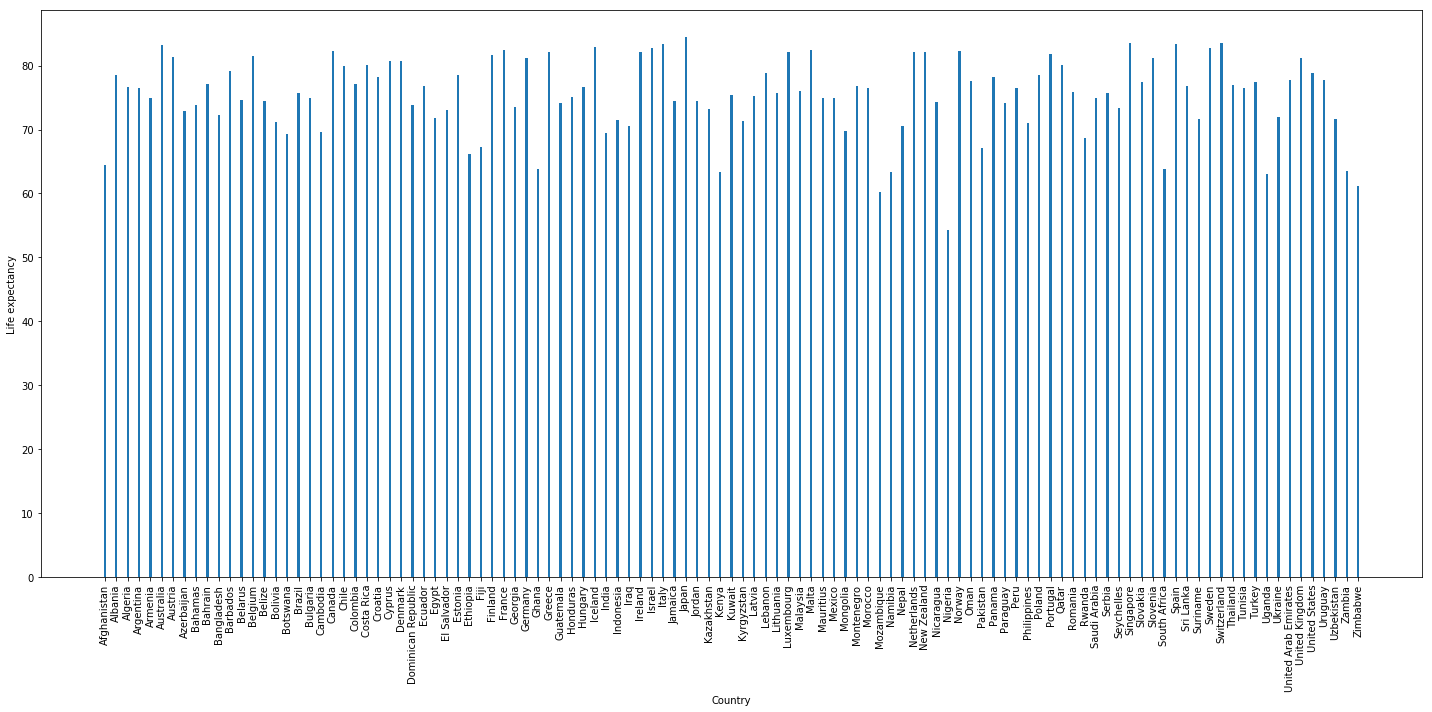

In [417]:

fig, ax = plt.subplots(figsize = (20,10))

idx = np.asarray(Data_health['Country'])

width = 0.2

ax.bar(idx, Data_health_back['Overall'], width=width)

ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Life expectancy')
fig.tight_layout()

plt.show()

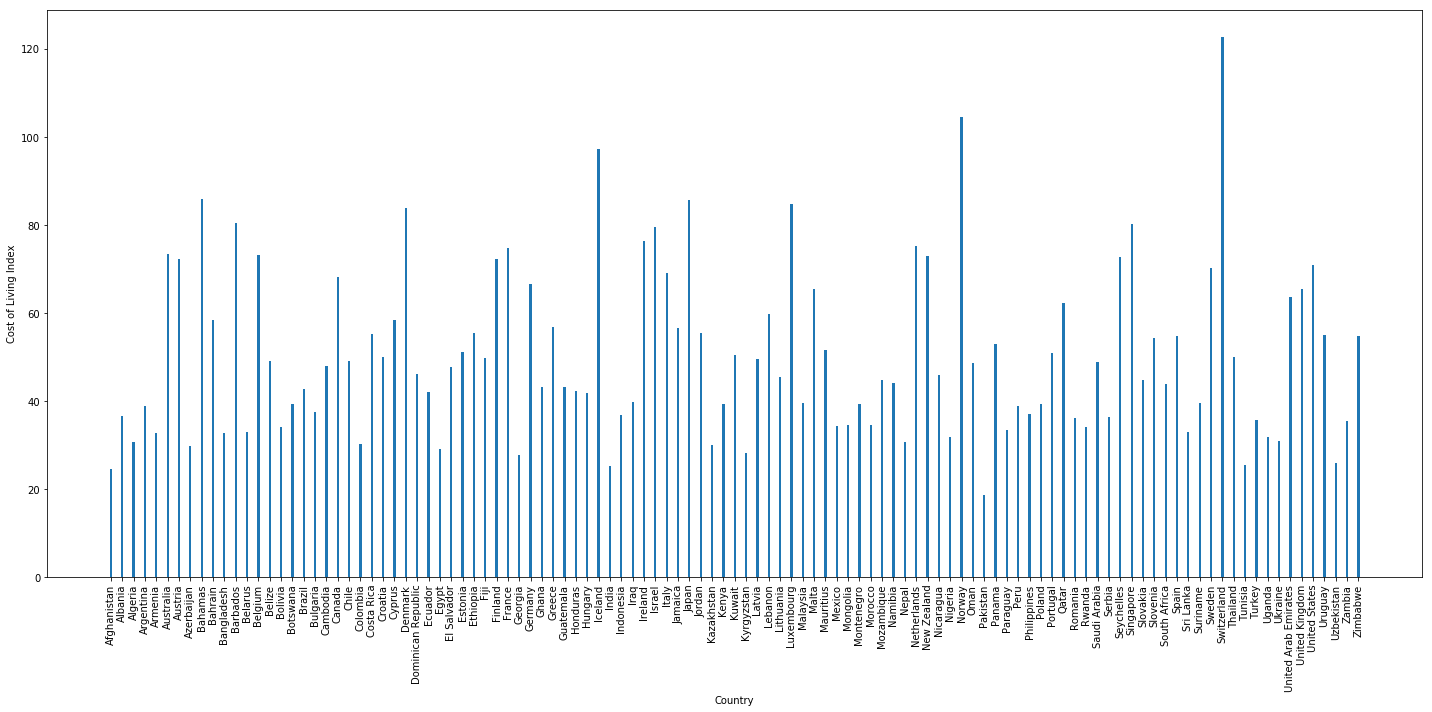

In [418]:
fig, ax = plt.subplots(figsize = (20,10))

idx = np.asarray(Data_health['Country'])

width = 0.2

ax.bar(idx, Data_health_back['Cost of Living Index'], width=width)

ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Cost of Living Index')
fig.tight_layout()

plt.show()

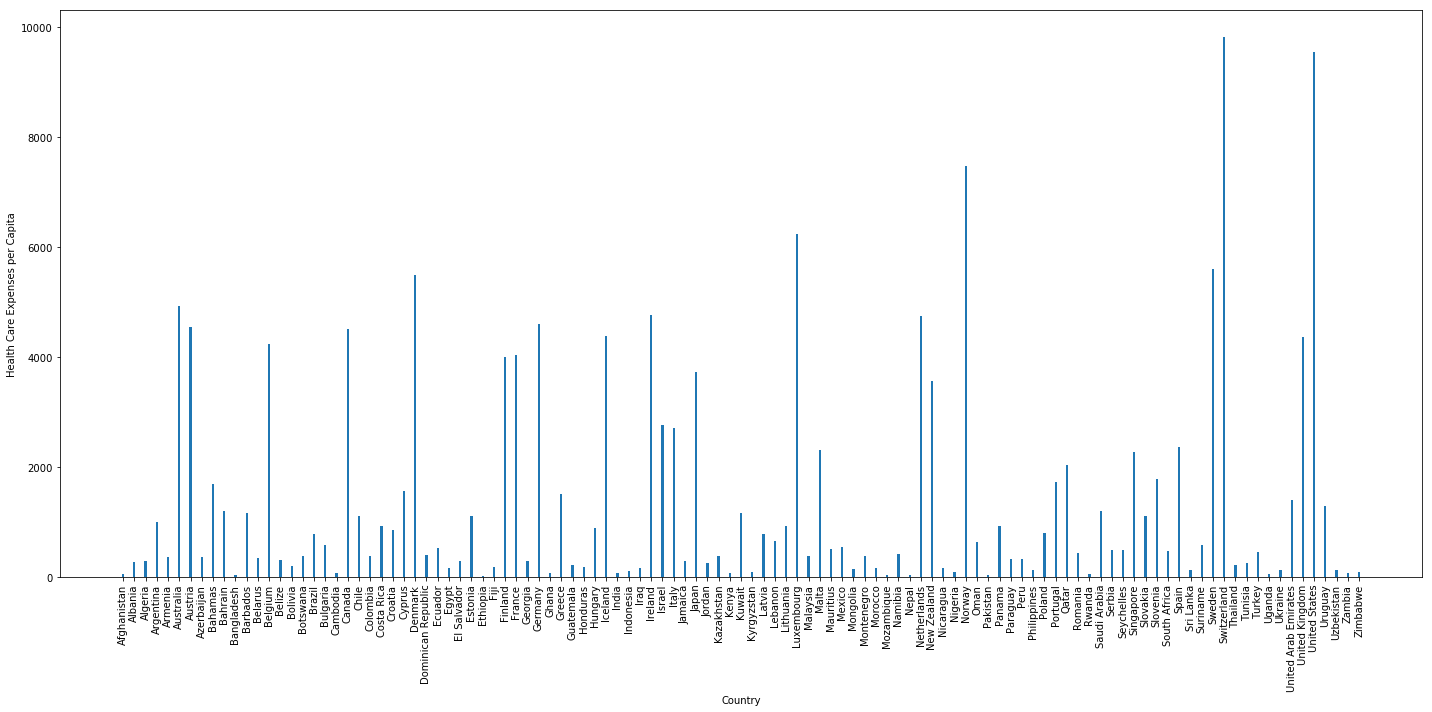

In [419]:
fig, ax = plt.subplots(figsize = (20,10))

idx = np.asarray(Data_health['Country'])

width = 0.2

ax.bar(idx, Data_health_back['Health Care Expenses'], width=width)

ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Health Care Expenses per Capita')
fig.tight_layout()

plt.show()

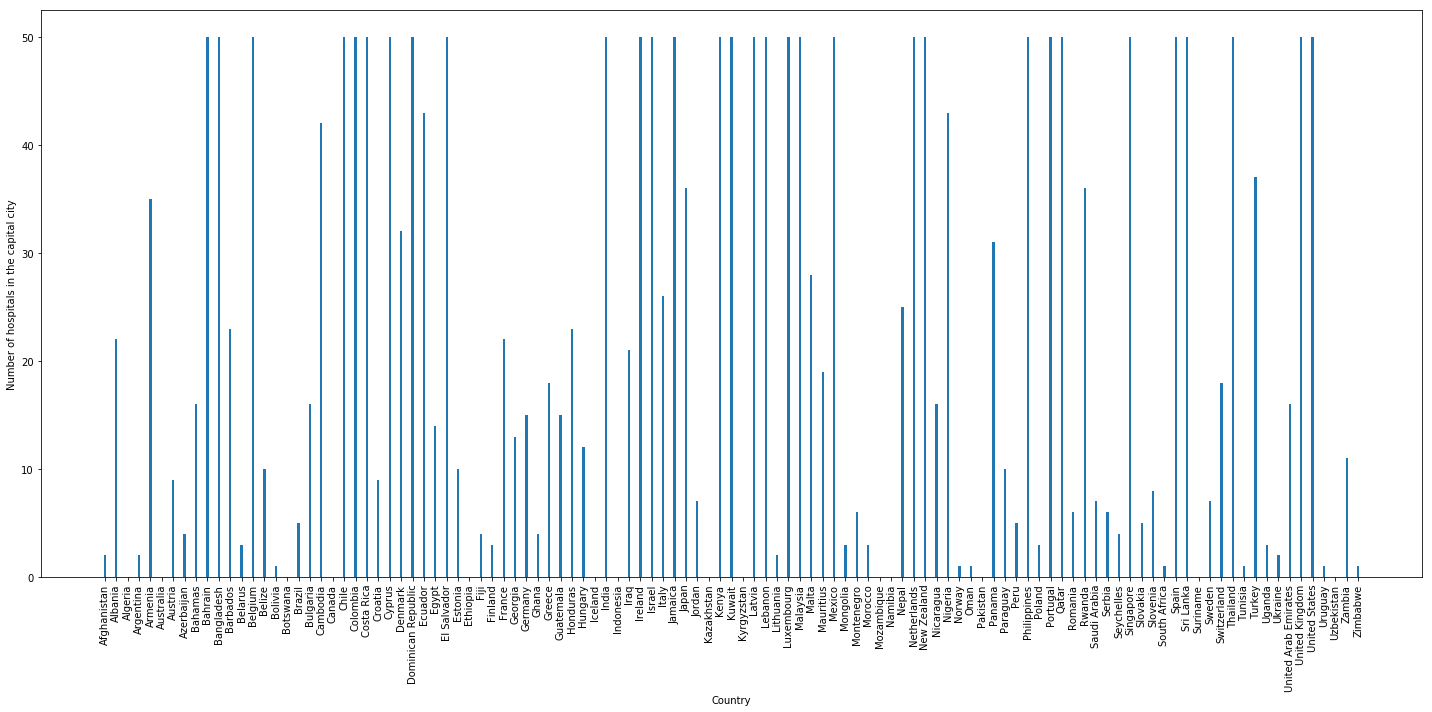

In [420]:
fig, ax = plt.subplots(figsize = (20,10))

idx = np.asarray(Data_health['Country'])

width = 0.2

ax.bar(idx, Data_health['Number of hospitals'], width=width)

ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Number of hospitals in the capital city')
fig.tight_layout()

plt.show()